In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

names_bw=['time', 'bw', 'op1', 'size', 'op2' ]
names_latency=['time', 'latency', 'op2', 'write_size', 'op3']

## Zoned, 200GB, 4K

### HM-LS: BW and Latency

In [2]:
df_hmls = pd.read_csv("lsdm/zoned/200GB/qd1/bs4KB/round2/lat_log_lat.1.log", sep=",", names=names_latency)
#process the bw data
# Calculate cumulative GBs of data written
df_hmls['cumulative_gb'] = df_hmls['write_size'].cumsum() / (1024**3)

# Step 2: Convert the 'time' column to seconds
df_hmls['time'] = df_hmls['time'] / 1000

# Step 3: Sort the DataFrame by 'time'
df_hmls = df_hmls.sort_values(by='time')

# # Step 5: Create the plot
# plt.figure(figsize=(8, 6), dpi=80)
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42

# plt.plot(df['time'], df['cumulative_gb'], linestyle='-')
# plt.xlabel('Time (seconds)', fontsize=16)
# plt.xticks(fontsize=14)
# plt.ylabel('Cumulative GBs Written', fontsize=16)
# plt.yticks(fontsize=14)
# plt.title('HMLS with 90:10 Zoned IO Pattern\n(200GB, bs=4KB)', fontsize=16)
# plt.grid(True)
# plt.savefig('fig/final/hmls_zoned_200gb_4kb_90_10_gb-vs-time.pdf', bbox_inches='tight')

### HM-Hybrid BW and Latency

In [3]:
df_hmhybrid = pd.read_csv("dm-zoned/zoned/200GB/qd1/bs4K/lat_log_lat.1.log", sep=",", names=names_latency)
#process the bw data
# Calculate cumulative GBs of data written
df_hmhybrid['cumulative_gb'] = df_hmhybrid['write_size'].cumsum() / (1024**3)

# Step 2: Convert the 'time' column to seconds
df_hmhybrid['time'] = df_hmhybrid['time'] / 1000

# Step 3: Sort the DataFrame by 'time'
df_hmhybrid = df_hmhybrid.sort_values(by='time')

In [4]:
df_dmhybrid = pd.read_csv("STL/zoned/200GB/qd1/bs4k/round2/lat_log_lat.1.log", sep=",", names=names_latency)
#process the bw data
# Calculate cumulative GBs of data written
df_dmhybrid['cumulative_gb'] = df_dmhybrid['write_size'].cumsum() / (1024**3)

# Step 2: Convert the 'time' column to seconds
df_dmhybrid['time'] = df_dmhybrid['time'] / 1000

# Step 3: Sort the DataFrame by 'time'
df_dmhybrid = df_dmhybrid.sort_values(by='time')

<Figure size 640x480 with 0 Axes>

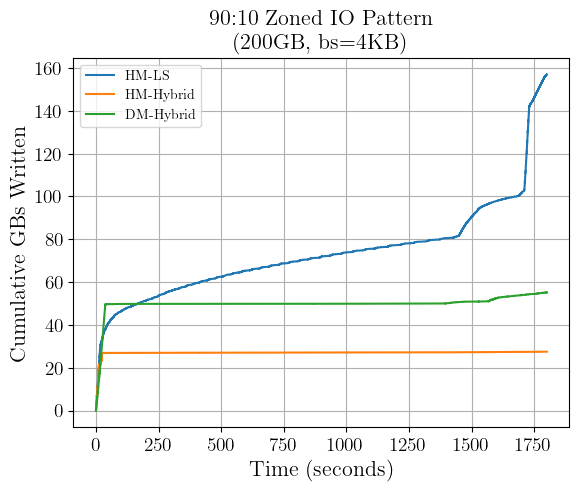

In [5]:
# Step 5: Create the plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()

# Plot the data from the first DataFrame (df1)
ax.plot(df_hmls['time'], df_hmls['cumulative_gb'], label='HM-LS')

# Plot the data from the second DataFrame (df2)
ax.plot(df_hmhybrid['time'], df_hmhybrid['cumulative_gb'], label='HM-Hybrid')

# Plot the data from the second DataFrame (df_dmhybrid)
ax.plot(df_dmhybrid['time'], df_dmhybrid['cumulative_gb'], label='DM-Hybrid')

# Customize the plot (add labels, legend, title, etc.)
ax.set_xlabel('Time (seconds)', fontsize=16)
plt.xticks(fontsize=14)
ax.set_ylabel('Cumulative GBs Written', fontsize=16)
plt.yticks(fontsize=14)
ax.set_title('90:10 Zoned IO Pattern\n(200GB, bs=4KB)', fontsize=16)
plt.grid(True)
ax.legend()
plt.savefig('fig/final/all_zoned_200gb_4kb_90_10_gb-vs-time.pdf', bbox_inches='tight')


---------------

### DM-Hybrid BW and Latency
AWAIT